<a href="https://colab.research.google.com/github/SebasMore07/Se-ales-y-Sistemas/blob/main/Parcial_2/Pregunta_1_y_3_Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Encuentre la expresion del espectro de Fourier (forma exponencial y trigonometrica) Y realice las simulaciones respectivas para graficar el espectro de Fourier del ejercicio 1 (magnitud y fase como diagrama de Bode en decibelios)

Espectro de Fourier para $\ x(t) = |A\cos(2\pi F_o t)|^2$

1. Simplificación de la señal

La señal dada es:
$\
x(t) = |A \cos(2\pi F_o t)|^2
\$


Usando la identidad trigonométrica $\ \cos^2(\theta) = \frac{1 + \cos(2\theta)}{2} \$, podemos reescribir la señal como:


$\
x(t) = A^2 \cos^2(2\pi F_o t) = \frac{A^2}{2} \left(1 + \cos(4\pi F_o t)\right)
\$


Por lo tanto, la señal se puede expresar como:
$\
x(t) = \frac{A^2}{2} + \frac{A^2}{2} \cos(4\pi F_o t)
\$

2. Coeficientes de Fourier

La señal $ x(t) $ es periódica con período $( T = \frac{1}{2F_o} )$. La serie de Fourier en forma exponencial se expresa como:

$\
x(t) = \sum_{n=-\infty}^{\infty} c_n e^{j 2\pi n F_o t}
$

Donde los coeficientes $( c_n )$ se calculan como:

$\
c_n = \frac{1}{T} \int_{-T/2}^{T/2} x(t) e^{-j 2\pi n F_o t} \, dt
$

Dado que $\ x(t) = \frac{A^2}{2} + \frac{A^2}{2} \cos(4\pi F_o t) $, podemos calcular los coeficientes $( c_n )$:

- Para $( n = 0 )$:

$\
c_0 = \frac{1}{T} \int_{-T/2}^{T/2} \left( \frac{A^2}{2} + \frac{A^2}{2} \cos(4\pi F_o t) \right) dt = \frac{A^2}{2}
$

- Para $( n = \pm 2 )$:

$\
c_2 = c_{-2} = \frac{A^2}{4}
$

- Para otros valores de $( n )$:

$\
c_n = 0
$

Por lo tanto, la serie de Fourier en forma exponencial es:

$\
x(t) = \frac{A^2}{2} + \frac{A^2}{4} e^{j 4\pi F_o t} + \frac{A^2}{4} e^{-j 4\pi F_o t}
$

En forma trigonométrica, la serie de Fourier se expresa como:

$\
x(t) = \frac{A^2}{2} + \frac{A^2}{2} \cos(4\pi F_o t)
$

3. Espectro de Fourier

El espectro de Fourier de la señal $( x(t) )$ tiene componentes en las frecuencias $( f = -2F_o )$, $( f = 0 )$, y $( f = 2F_o )$, con magnitudes $( \frac{A^2}{4} )$, $( \frac{A^2}{2} )$, y $( \frac{A^2}{4} )$, respectivamente. Las fases correspondientes son $( 0 )$ para todas las componentes, ya que los coeficientes son reales y positivos.

4. Error relativo y reconstrucción de la señal

El error relativo entre la señal original $ x(t) $ y la señal reconstruida $ \hat{x}(t) $ se define como:

$\
e_r[\%] = \frac{\bar{P}_e}{\bar{P}_x} 100[\%] = \left(1 - \frac{\sum_{n=-N}^N |c_n|^2 P_n}{\bar{P}_x}\right) 100[\%]
$

Donde:
- $( \bar{P}_e )$ es la potencia media del error.
- $( \bar{P}_x )$ es la potencia media de la señal original.
- $( P_n = \frac{1}{T} \int_T |\phi_n(t)|^2 dt )$ es la potencia de la función base $( \phi_n(t) )$.

Para la señal $ x(t) $, el error relativo disminuye rápidamente a medida que $( N )$ aumenta, ya que la señal tiene un número finito de componentes de frecuencia.

5. Simulaciones y gráficos

Para visualizar el espectro de Fourier, el error relativo y la señal reconstruida, se utilizó Python con las bibliotecas $\texttt{numpy} y \texttt{matplotlib}$. Los resultados muestran que:

- El espectro de Fourier tiene componentes en $( f = -2F_o )$, $( f = 0 )$, y $( f = 2F_o )$.
- El error relativo disminuye rápidamente a medida que $( N )$ aumenta.
- La señal reconstruida para $( N = 50 )$ coincide casi perfectamente con la señal original.

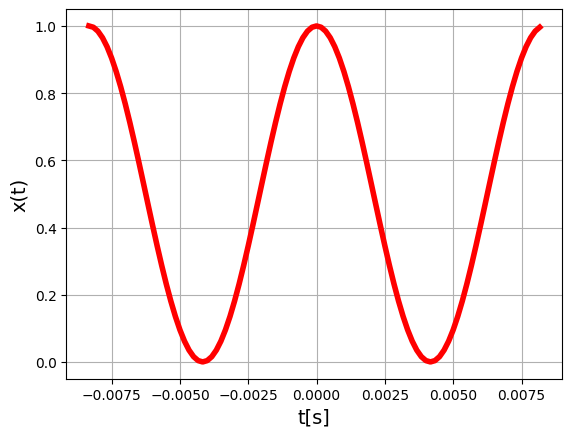

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#mostrar la señal
Fo = 60
T = 1/Fo
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas
A=1 #Constante definida
x = (A*np.cos(2*np.pi*Fo*tv))**2

#graficar señal original
plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

In [2]:
N = 50 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [3]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = 0*nv
Cn[N] = (A**2)/2 #Nivel DC
Cn[N+2] = (A**2)/4
Cn[N-2]=(A**2)/4

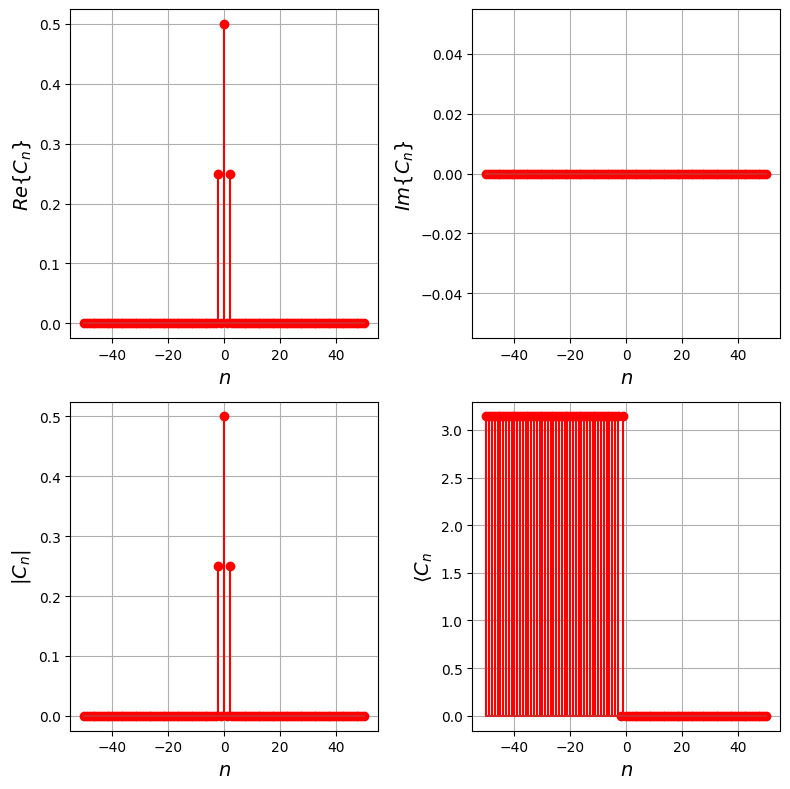

In [4]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

<ipython-input-5-06927cfba69c>:4: RuntimeWarning: divide by zero encountered in log10
  plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')


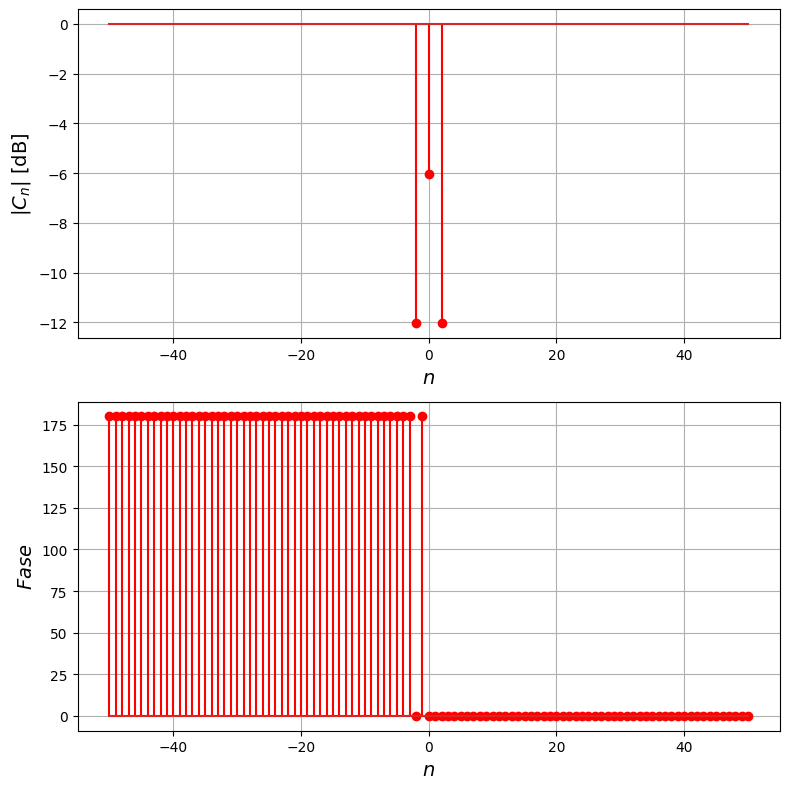

In [5]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.stem(nv, 20 * np.log10(abs(Cn)), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$|C_n|$ [dB]', fontsize=14)
plt.axis('tight')
plt.grid()


plt.subplot(2, 1, 2)
plt.stem(nv, np.angle(Cn, deg=True), 'r')
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel(r'$Fase$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.tight_layout()

In [6]:
from ipywidgets import interact,IntSlider
Px = 0.375 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',marker='o', markersize=5, label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(0,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50), Output()), _dom_classes=('widget-interact'…

<function __main__.pltest(Na=1)>

# 3. Consulte en que consiste la distorsion total de armonicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones. El usuario podra escoger diferentes valores de R y C. Discuta los resultados obtenidos



* **Distorsión Total de Armónicos (THD)**
  
  La Distorsión Total de Armónicos (THD) es una medida que cuantifica la distorsión de una señal periódica, que se produce debido a la presencia de componentes armónicos. Los armónicos son frecuencias que son múltiplos enteros de la frecuencia fundamental. Un THD elevado puede indicar problemas en sistemas eléctricos, como reducción de la eficiencia y calentamiento de equipos.

 Fórmula del THD

 El THD se calcula como:

$${THD} = \frac{\sqrt{\sum_{n=2}^{\infty} V_n^2}}{V_1} \times 100\%
$$

  * Donde:
    * $V_1$: Magnitud del componente de la frecuencia fundamental.
    * $V_n$: Magnitud del n-ésimo armónico.

* **Cálculo del THD desde la FFT**
  La Transformada Rápida de Fourier (FFT) permite descomponer una señal en sus componentes de frecuencia. Para calcular el THD desde la FFT, sigue estos pasos:
  * Realiza la FFT de la señal para obtener las amplitudes de las diferentes frecuencias.
  * Identifica $V_1, V_2, V_3, \ldots, V_n$
  * Sustituye en la fórmula del THD:

  $${THD} = \frac{\sqrt{V_2^2 + V_3^2 + \cdots + V_n^2}}{V_1} \times 100\%
$$

* **Factor de Potencia**
  El factor de potencia (FP) mide la eficiencia con la que se utiliza la energía eléctrica en un sistema. Se define como la relación entre la potencia activa y la potencia aparente:

$$FP = \cos(\phi) = \frac{P}{S}$$

  * Donde:
     * 𝑃: Potencia activa, medida en vatios (W), que realiza trabajo útil.
     * 𝑆: Potencia aparente, medida en voltamperios (VA), que es la combinación de potencia activa y reactiva.
     * 𝞥:  Ángulo de desfase entre la tensión y la corriente.
  
* **Distorsión del Factor de Potencia (DFP)**
  La distorsión del factor de potencia (DFP) se refiere al impacto de los armónicos en el factor de potencia total de un sistema. Se relaciona con el THD de la corriente o de la tensión.
  
  Fórmula para calcular DFP

  La distorsión del factor de potencia se puede calcular usando el THD con la siguiente aproximación:

$$DFP \approx \frac{THD^2}{\sqrt{1 + THD^2}}$$

  Cálculo del Factor de Potencia Total
  Una vez que se tiene el DFP, se puede calcular el factor de potencia total como:

$$FP_{total} = FP_{fundamental} \times \sqrt{1 - DFP^2}$$

 **Ejemplo Práctico de Cálculo**
  
  Supongamos que:
   * $FP_{fundamental} = 0.9$
   * $THD = 0.15$

  Calcular DFP:
  $$DFP \approx \frac{(0.15)^2}{\sqrt{1 + (0.15)^2}} \approx 0.0221$$
  Calcular el factor de potencial total:
  $$FP_{total} = 0.9 \times \sqrt{1 - (0.0221)^2} \approx 0.8998$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular THD
def calculate_thd(signal, harmonics_count=10):
    fft = np.fft.fft(signal) / len(signal)  # FFT normalizada
    fft = np.abs(fft[:len(signal)//2])  # Magnitud de la FFT (mitad útil)
    fundamental = fft[1]  # Componente fundamental (frecuencia base)
    harmonics = fft[2:harmonics_count+2]  # Armónicos seleccionados
    thd = np.sqrt(np.sum(harmonics**2)) / fundamental * 100
    return thd

# Función para calcular el factor de potencia total
def calculate_power_factor(thd, fp_fundamental):
    dfp = (thd / 100)**2 / np.sqrt(1 + (thd / 100)**2)  # Distorsión del FP
    return fp_fundamental * np.sqrt(1 - dfp**2)

# Simulación de señales para un rectificador de onda completa
def rectifier_waveform(t, load_type, R, C=None):
    # Señal de entrada (onda senoidal)
    v_in = np.abs(np.sin(2 * np.pi * t))  # Rectificador de onda completa
    if load_type == "resistive":
        i_out = v_in / R
    elif load_type == "rc_series" and C is not None:
        i_out = np.gradient(v_in, t[1]-t[0]) / C + v_in / R
    else:
        raise ValueError("Carga no válida o parámetros faltantes")
    return v_in, i_out

# Parámetros de simulación
T = 1  # Periodo de la señal (1 s)
fs = 10000  # Frecuencia de muestreo
t = np.linspace(0, T, fs, endpoint=False)  # Vector de tiempo
fp_fundamental = 1.0  # Factor de potencia fundamental ideal

# Opciones del usuario
print("Seleccione los parámetros de la carga:")
load_type = input("Tipo de carga ('resistive' o 'rc_series'): ").strip().lower()
R = float(input("Ingrese el valor de la resistencia R (ohms): "))
C = None
if load_type == "rc_series":
    C = float(input("Ingrese el valor de la capacitancia C (faradios): "))

# Generar la señal para la carga seleccionada
v_in, i_out = rectifier_waveform(t, load_type, R, C)

# Cálculo del THD y factor de potencia total
thd = calculate_thd(i_out)
fp_total = calculate_power_factor(thd, fp_fundamental)

# Resultados
print(f"\nResultados para la carga {load_type}:")
print(f"THD (%): {thd:.2f}")
print(f"Factor de potencia total: {fp_total:.4f}")

# Graficar señales
plt.figure(figsize=(10, 6))
plt.plot(t, v_in, label="Voltaje de entrada (V_in)")
plt.plot(t, i_out, label="Corriente de salida (I_out)", linestyle="--")
plt.title(f"Rectificador de onda completa - Carga: {load_type}")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


Seleccione los parámetros de la carga:


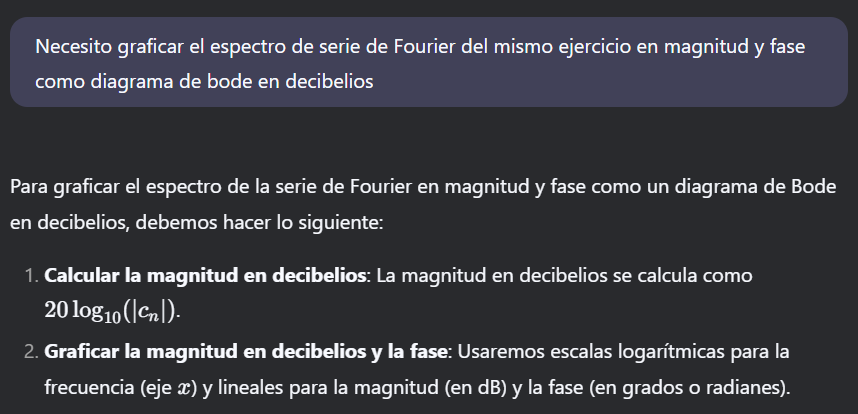